Dataset Shape: (1025, 14)
First 5 rows:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

=== Decision Tree Results ===
Accuracy: 0.8
Confusion Matrix:
 [[71 31]
 [10 93]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78       102
           1       0.75      0.90      0.82       103

    accuracy                           0.80       205
   macro avg   

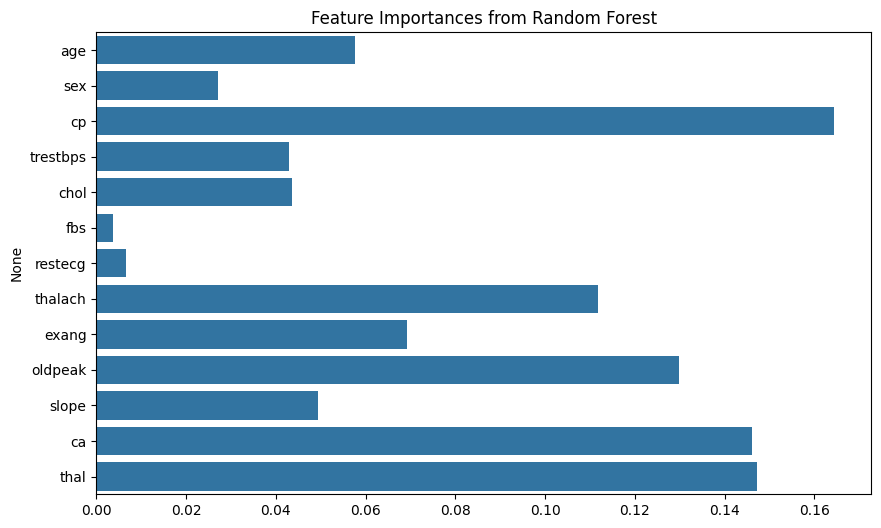


Cross-validated scores: [0.97073171 0.91219512 0.95121951 0.91219512 0.90243902]
Mean CV Accuracy: 0.9297560975609755


In [3]:
# ==============================
# Decision Trees & Random Forests
# Dataset: Heart Disease
# ==============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import graphviz

# 1. Load Dataset

df = pd.read_csv('heart.csv')
print("Dataset Shape:", df.shape)
print("First 5 rows:\n", df.head())

# Features and Target
X = df.drop("target", axis=1)
y = df["target"]

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Decision Tree Classifier
dtree = DecisionTreeClassifier(max_depth=4, random_state=42)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

print("\n=== Decision Tree Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 4. Visualize the Tree
dot_data = export_graphviz(
    dtree, out_file=None,
    feature_names=X.columns,
    class_names=["No Disease", "Disease"],
    filled=True, rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph.render("heart_dtree")  # saves heart_dtree.pdf

# 5. Random Forest Classifier
rforest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rforest.fit(X_train, y_train)
y_pred_rf = rforest.predict(X_test)

print("\n=== Random Forest Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# 6. Feature Importances
importances = rforest.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances from Random Forest")
plt.show()

# 7. Cross-Validation
cv_scores = cross_val_score(rforest, X, y, cv=5)
print("\nCross-validated scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
